# Survival Analysis

In [1]:
# Load the packages
import datetime
import itertools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import sksurv
from lifelines import CoxPHFitter
from lifelines.plotting import plot_lifetimes 
from lifelines import KaplanMeierFitter

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_excel('Cancer patient data.xlsx')
df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT


In [3]:
df.shape

(8468, 14)

In [4]:
df.columns

Index(['BIRTH_DATE_off', 'DEATH_DATE_off', 'sex', 'race', 'LUNG', 'PANCREAS',
       'THYROID', 'COLORECTAL', 'MELANOMA', 'LUNG DT', 'PANCREAS_DT',
       'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 14 columns):
BIRTH_DATE_off    8468 non-null datetime64[ns]
DEATH_DATE_off    447 non-null datetime64[ns]
sex               8468 non-null object
race              8466 non-null object
LUNG              8468 non-null int64
PANCREAS          8468 non-null int64
THYROID           8468 non-null int64
COLORECTAL        8468 non-null int64
MELANOMA          8468 non-null int64
LUNG DT           1485 non-null datetime64[ns]
PANCREAS_DT       660 non-null datetime64[ns]
THYROID_DT        745 non-null datetime64[ns]
COLORECTAL_DT     946 non-null datetime64[ns]
MELANOMA_DT       346 non-null datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 926.3+ KB


In [6]:
df.describe(include = 'all')

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
count,8468,447,8468,8466,8468.000000,8468.000000,8468.000000,8468.000000,8468.000000,1485,660,745,946,346
unique,6667,399,2,8,NaN,NaN,NaN,NaN,NaN,1025,536,609,751,316
top,1947-08-02 00:00:00,2015-12-03 00:00:00,Female,White,NaN,NaN,NaN,NaN,NaN,2013-03-07 00:00:00,2016-02-09 00:00:00,2014-05-27 00:00:00,2013-05-22 00:00:00,2016-01-06 00:00:00
freq,6,4,4290,5725,NaN,NaN,NaN,NaN,NaN,6,4,5,5,3
first,1911-06-27 00:00:00,2009-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-12-16 00:00:00,2008-09-26 00:00:00,1960-01-27 00:00:00,1999-12-05 00:00:00,1986-06-02 00:00:00
last,2014-12-21 00:00:00,2017-06-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-05 00:00:00,2016-09-04 00:00:00,2016-09-26 00:00:00,2016-07-23 00:00:00,2016-07-27 00:00:00
mean,NaN,NaN,NaN,NaN,0.175366,0.077940,0.087978,0.111951,0.041096,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.380302,0.268094,0.283280,0.315325,0.198524,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

BIRTH_DATE_off       0
DEATH_DATE_off    8021
sex                  0
race                 2
LUNG                 0
PANCREAS             0
THYROID              0
COLORECTAL           0
MELANOMA             0
LUNG DT           6983
PANCREAS_DT       7808
THYROID_DT        7723
COLORECTAL_DT     7522
MELANOMA_DT       8122
dtype: int64

## Data Cleaning and Feature Engineering

In [8]:
# Remove all patients who were diagnosed after 8/25/16

lung_index = list(df[df['LUNG DT'] > datetime.date(2016, 8, 25)].index)
pancreas_index = list(df[df['PANCREAS_DT'] > datetime.date(2016, 8, 25)].index)
thyroid_index = list(df[df['THYROID_DT'] > datetime.date(2016, 8, 25)].index)
colorectal_index = list(df[df['COLORECTAL_DT'] > datetime.date(2016, 8, 25)].index)
melanoma_index = list(df[df['MELANOMA_DT'] > datetime.date(2016, 8, 25)].index)

all_index = lung_index + pancreas_index + thyroid_index + colorectal_index + melanoma_index

before_cutoff = df.drop(all_index)
before_cutoff.shape

(8463, 14)

In [9]:
# Keep patients who died after 8/25/16
# Censoring status 0 = censored, 1 = dead
before_cutoff
before_cutoff['status'] = before_cutoff['DEATH_DATE_off'].apply(lambda x: 0 if (x > datetime.date(2016, 8, 25) or type(x) == pd._libs.tslibs.nattype.NaTType) else 1)
before_cutoff.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,status
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,0
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,1
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,1
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,0
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,0


In [10]:
before_cutoff.status.value_counts()

0    8063
1     400
Name: status, dtype: int64

In [11]:
# Remove all patients who do not have a diagnosis date
diagnosis_col = ['LUNG DT', 'PANCREAS_DT', 'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT']

clean_df = before_cutoff.dropna(how = 'all', subset = diagnosis_col)
clean_df.reset_index(drop = True, inplace = True)
clean_df.shape

(4148, 15)

In [12]:
clean_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,status
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,0
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,1
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,1
3,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,0
4,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,0


In [13]:
# derive age at the time of cancer diagnosis
clean_df['earliest_diagnosis'] = clean_df[diagnosis_col].min(axis = 1)
clean_df['age'] = ((clean_df['earliest_diagnosis'] - clean_df.BIRTH_DATE_off).dt.days/365).astype(int)

clean_df.age.describe()

count    4148.000000
mean       60.939971
std        14.935292
min         0.000000
25%        53.000000
50%        63.000000
75%        71.000000
max       102.000000
Name: age, dtype: float64

In [14]:
# create age groups
age_bins = [-1] + list(np.linspace(10, 110, 11))
clean_df['age_groups'] = pd.cut(x = clean_df['age'], bins = age_bins, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
clean_df['age_groups'].astype('int')

clean_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,status,earliest_diagnosis,age,age_groups
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,0,2013-09-01,53,5
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,1,2016-04-02,60,5
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,1,2015-04-11,69,6
3,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,0,2012-11-29,66,6
4,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,0,2012-06-24,74,7


In [15]:
# categorize race into White, Black/African-American, Asian/Mideast Indian, and Others
race = ['White', 'Black/African-American', 'Asian/Mideast Indian']
clean_df['ethnicity'] = clean_df.race.apply(lambda x: x if x in race else 'Others')

In [16]:
# time to death
clean_df['cutoff_date'] = clean_df['DEATH_DATE_off'].apply(lambda x: min(datetime.date(2016, 8, 25), x))
clean_df['time'] = (clean_df['cutoff_date'] - clean_df['earliest_diagnosis']).dt.days
clean_df.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,...,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,status,earliest_diagnosis,age,age_groups,ethnicity,cutoff_date,time
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,...,NaT,NaT,NaT,0,2013-09-01,53,5,Black/African-American,2016-08-25,1089
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,...,NaT,NaT,NaT,1,2016-04-02,60,5,Black/African-American,2016-04-20,18
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,...,NaT,NaT,NaT,1,2015-04-11,69,6,Black/African-American,2015-05-25,44
3,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,...,2012-11-29,NaT,NaT,0,2012-11-29,66,6,Black/African-American,2016-08-25,1365
4,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,...,2012-06-24,NaT,NaT,0,2012-06-24,74,7,Black/African-American,2016-08-25,1523


## Survival Analysis

Analyze survival rate by gender, race and age group in deciles (11-20, 21-30, ....) for patients with following cancer: lung, pancreas, thyroid, colorectal, melanoma.

In [17]:
# create different cancer cohorts
lung = clean_df[clean_df.LUNG == 1]
pancreas = clean_df[clean_df.PANCREAS == 1]
thyroid = clean_df[clean_df.THYROID == 1]
colorectal = clean_df[clean_df.COLORECTAL == 1]
melanoma = clean_df[clean_df.MELANOMA == 1]

### Analyze survival rate by gender

In [18]:
# analyze by gender
def gender_survive(df):
    T = df.time
    E = df.status
    
    groups = df.sex
    i1 = (groups == 'Male')     
    i2 = (groups == 'Female')     

    kmf = KaplanMeierFitter() 
    kmf.fit(T[i1], E[i1], label = 'Male')
    a = kmf.plot()

    kmf.fit(T[i2], E[i2], label = 'Female')
    kmf.plot(ax = a)

Based on the following analysis, we could conclude that in the early years after the diagnosis of lung cancer, females tend to have a higher survival rate. But around 5.5 years after diagnosis, males tend to have a higher survial rate.

(0, 5000)

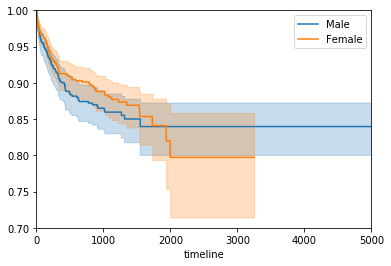

In [19]:
# create the plots
gender_survive(lung)
plt.ylim(0.7, 1.0)
plt.xlim(0, 5000)

For pancreas cancer, males tend to have a higher survival rate.

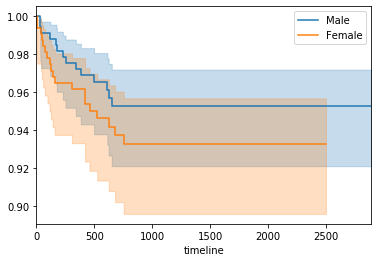

In [20]:
gender_survive(pancreas)

For thyroid cancer, females tend to have a higher survival rate.

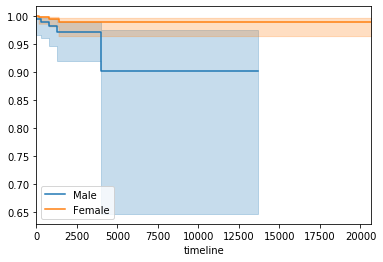

In [21]:
gender_survive(thyroid)

For colorectal cancer, males and females have similar survival rate in the early years of diagnosis. However, about 8 years after diagnosis, females tend to have lower survival rate.

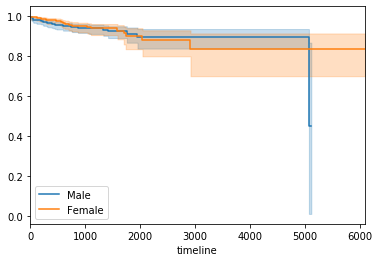

In [22]:
gender_survive(colorectal)

Similar to colorectal cancer, for melanoma cancer, males and females have similar survival rate in the early years of diagnosis. However, about 12 years after diagnosis, females tend to have lower survival rate.

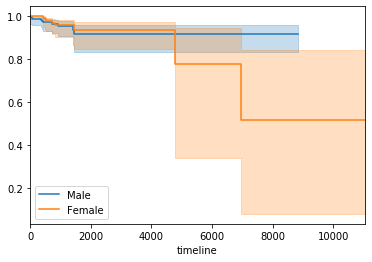

In [23]:
gender_survive(melanoma)

### Analyze survival rate by age groups

For all cancer types, generally older people tend to have lower survival rate, while there are some exceptions.

In [24]:
lung.age_groups.value_counts()[lung.age_groups.value_counts() == 0]

Series([], Name: age_groups, dtype: int64)

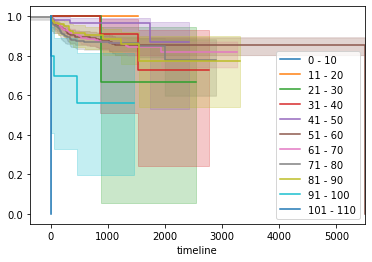

In [25]:
T = lung.time
E = lung.status

groups = lung.age_groups
i1 = (groups == 0)     
i2 = (groups == 1)  
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)  
i10 = (groups == 9) 
i11 = (groups == 10)  

kmf = KaplanMeierFitter() 
kmf.fit(T[i1], E[i1], label = '0 - 10')
a = kmf.plot()

kmf.fit(T[i2], E[i2], label = '11 - 20')
kmf.plot(ax = a)

kmf.fit(T[i3], E[i3], label = '21 - 30')
kmf.plot(ax = a)

kmf.fit(T[i4], E[i4], label = '31 - 40')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = '41 - 50')
kmf.plot(ax = a)

kmf.fit(T[i6], E[i6], label = '51 - 60')
kmf.plot(ax = a)

kmf.fit(T[i7], E[i7], label = '61 - 70')
kmf.plot(ax = a)

kmf.fit(T[i8], E[i8], label = '71 - 80')
kmf.plot(ax = a)

kmf.fit(T[i9], E[i9], label = '81 - 90')
kmf.plot(ax = a)

kmf.fit(T[i10], E[i10], label = '91 - 100')
kmf.plot(ax = a)

kmf.fit(T[i11], E[i11], label = '101 - 110')
kmf.plot(ax = a)

In [26]:
pancreas.age_groups.value_counts()[pancreas.age_groups.value_counts() == 0]

10    0
1     0
0     0
Name: age_groups, dtype: int64

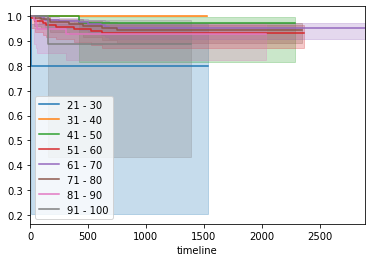

In [27]:
T = pancreas.time
E = pancreas.status

groups = pancreas.age_groups 
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)  
i10 = (groups == 9) 

kmf = KaplanMeierFitter() 
kmf.fit(T[i3], E[i3], label = '21 - 30')
a = kmf.plot()

kmf.fit(T[i4], E[i4], label = '31 - 40')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = '41 - 50')
kmf.plot(ax = a)

kmf.fit(T[i6], E[i6], label = '51 - 60')
kmf.plot(ax = a)

kmf.fit(T[i7], E[i7], label = '61 - 70')
kmf.plot(ax = a)

kmf.fit(T[i8], E[i8], label = '71 - 80')
kmf.plot(ax = a)

kmf.fit(T[i9], E[i9], label = '81 - 90')
kmf.plot(ax = a)

kmf.fit(T[i10], E[i10], label = '91 - 100')
kmf.plot(ax = a)

In [28]:
thyroid.age_groups.value_counts()[thyroid.age_groups.value_counts() == 0]

10    0
9     0
Name: age_groups, dtype: int64

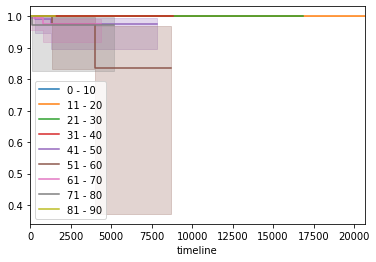

In [29]:
T = thyroid.time
E = thyroid.status

groups = thyroid.age_groups
i1 = (groups == 0)     
i2 = (groups == 1)  
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)   

kmf = KaplanMeierFitter() 
kmf.fit(T[i1], E[i1], label = '0 - 10')
a = kmf.plot()

kmf.fit(T[i2], E[i2], label = '11 - 20')
kmf.plot(ax = a)

kmf.fit(T[i3], E[i3], label = '21 - 30')
kmf.plot(ax = a)

kmf.fit(T[i4], E[i4], label = '31 - 40')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = '41 - 50')
kmf.plot(ax = a)

kmf.fit(T[i6], E[i6], label = '51 - 60')
kmf.plot(ax = a)

kmf.fit(T[i7], E[i7], label = '61 - 70')
kmf.plot(ax = a)

kmf.fit(T[i8], E[i8], label = '71 - 80')
kmf.plot(ax = a)

kmf.fit(T[i9], E[i9], label = '81 - 90')
kmf.plot(ax = a)

In [30]:
colorectal.age_groups.value_counts()[colorectal.age_groups.value_counts() == 0]

10    0
0     0
Name: age_groups, dtype: int64

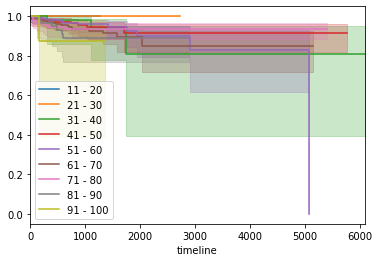

In [31]:
T = colorectal.time
E = colorectal.status

groups = colorectal.age_groups    
i2 = (groups == 1)  
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)  
i10 = (groups == 9)  

kmf = KaplanMeierFitter() 
kmf.fit(T[i2], E[i2], label = '11 - 20')
a = kmf.plot()

kmf.fit(T[i3], E[i3], label = '21 - 30')
kmf.plot(ax = a)

kmf.fit(T[i4], E[i4], label = '31 - 40')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = '41 - 50')
kmf.plot(ax = a)

kmf.fit(T[i6], E[i6], label = '51 - 60')
kmf.plot(ax = a)

kmf.fit(T[i7], E[i7], label = '61 - 70')
kmf.plot(ax = a)

kmf.fit(T[i8], E[i8], label = '71 - 80')
kmf.plot(ax = a)

kmf.fit(T[i9], E[i9], label = '81 - 90')
kmf.plot(ax = a)

kmf.fit(T[i10], E[i10], label = '91 - 100')
kmf.plot(ax = a)

In [32]:
melanoma.age_groups.value_counts()[melanoma.age_groups.value_counts() == 0]

10    0
0     0
Name: age_groups, dtype: int64

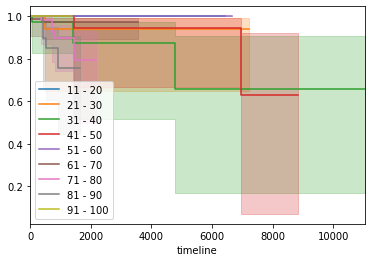

In [33]:
T = melanoma.time
E = melanoma.status

groups = melanoma.age_groups    
i2 = (groups == 1)  
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)  
i10 = (groups == 9)  

kmf = KaplanMeierFitter() 
kmf.fit(T[i2], E[i2], label = '11 - 20')
a = kmf.plot()

kmf.fit(T[i3], E[i3], label = '21 - 30')
kmf.plot(ax = a)

kmf.fit(T[i4], E[i4], label = '31 - 40')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = '41 - 50')
kmf.plot(ax = a)

kmf.fit(T[i6], E[i6], label = '51 - 60')
kmf.plot(ax = a)

kmf.fit(T[i7], E[i7], label = '61 - 70')
kmf.plot(ax = a)

kmf.fit(T[i8], E[i8], label = '71 - 80')
kmf.plot(ax = a)

kmf.fit(T[i9], E[i9], label = '81 - 90')
kmf.plot(ax = a)

kmf.fit(T[i10], E[i10], label = '91 - 100')
kmf.plot(ax = a)

### Analyze survival rate by race

Except for thyroid cancer, African Americans seem to have the lowest survival rate among all ethnicity. 

In [34]:
def race_survive(df):
    T = df.time
    E = df.status

    groups = df.ethnicity
    i1 = (groups == 'White')     
    i2 = (groups == 'Black/African-American')    
    i3 = (groups == 'Asian/Mideast Indian')  
    i4 = (groups == 'Others')

    kmf = KaplanMeierFitter() 
    kmf.fit(T[i1], E[i1], label = 'White')
    a = kmf.plot()

    kmf.fit(T[i2], E[i2], label = 'Black/African-American')
    kmf.plot(ax = a)

    kmf.fit(T[i3], E[i3], label = 'Asian/Mideast Indian')
    kmf.plot(ax = a)

    kmf.fit(T[i4], E[i4], label = 'Others')
    kmf.plot(ax = a)

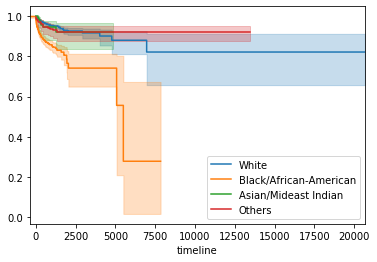

In [35]:
race_survive(clean_df)

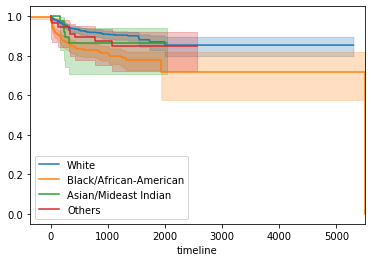

In [36]:
race_survive(lung)

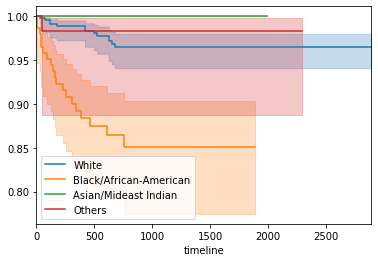

In [37]:
race_survive(pancreas)

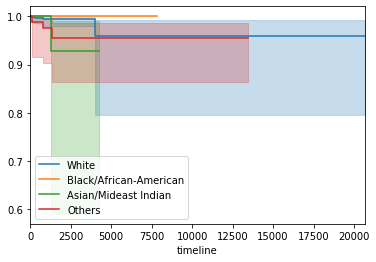

In [38]:
race_survive(thyroid)

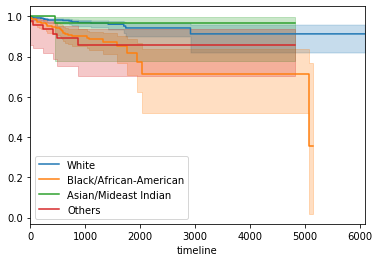

In [39]:
race_survive(colorectal)

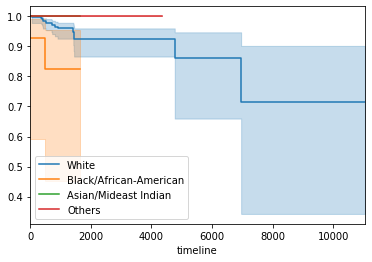

In [40]:
race_survive(melanoma)

## Questions

Q1. Which cancer has the highest survival for this cohort? <br>
Q2. Which cancer has the lowest survival for this cohort?

Based on the following analysis, for this cohort thyroid cancer has the highest survival, and lung cancer has the lowest survival.

In [41]:
# calculate the survival rate at the end of the study

lung_survival = round(len(lung[lung.status == 0])/len(lung)*100, 2)
pancreas_survival = round(len(pancreas[pancreas.status == 0])/len(pancreas)*100, 2)
thyroid_survival = round(len(thyroid[thyroid.status == 0])/len(thyroid)*100, 2)
colorectal_survival = round(len(colorectal[colorectal.status == 0])/len(colorectal)*100, 2)
melanoma_survival = round(len(melanoma[melanoma.status == 0])/len(melanoma)*100, 2)

print('The survival rates for lung cancer, pancreas cancer, thyroid cancer, colorectal cancer, and melanoma cancer are {}%, {}%, {}%, {}%, and {}%.'.format(lung_survival, pancreas_survival, thyroid_survival, colorectal_survival, melanoma_survival))

The survival rates for lung cancer, pancreas cancer, thyroid cancer, colorectal cancer, and melanoma cancer are 87.59%, 94.98%, 98.92%, 93.87%, and 95.09%.


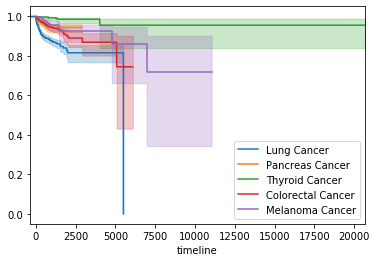

In [42]:
# use the kaplan meier model to plot the survival curve

# define duration and event
T = clean_df.time
E = clean_df.status

# define duration and event
i1 = (clean_df.LUNG == 1)      
i2 = (clean_df.PANCREAS == 1)
i3 = (clean_df.THYROID == 1)
i4 = (clean_df.COLORECTAL == 1)
i5 = (clean_df.MELANOMA == 1)

# create an kmf object
kmf = KaplanMeierFitter() 

# fit the first group into the model
kmf.fit(T[i1], E[i1], label='Lung Cancer')

# create an estimate
a = kmf.plot()

kmf.fit(T[i2], E[i2], label = 'Pancreas Cancer')
kmf.plot(ax = a)

kmf.fit(T[i3], E[i3], label = 'Thyroid Cancer')
kmf.plot(ax = a)

kmf.fit(T[i4], E[i4], label = 'Colorectal Cancer')
kmf.plot(ax = a)

kmf.fit(T[i5], E[i5], label = 'Melanoma Cancer')
kmf.plot(ax = a)

Q3. How many patients had 2 cancer diagnosis?

For this cohort, 29 patients had 2 cancer diagnosis.

In [43]:
two_cancer = clean_df.dropna(subset = diagnosis_col, thresh = 2)
len(two_cancer)

29

Q4. Which age group has the lowest survival after 400 days since cancer diagnosis?

Age group of 101 - 110 years old has the lowest survival rate after 400 days since cancer diagnosis.

In [44]:
q4 = clean_df[['age_groups', 'time', 'status']]

T = q4.time
E = q4.status

groups = q4.age_groups   
i1 = (groups == 0)
i2 = (groups == 1)  
i3 = (groups == 2)  
i4 = (groups == 3)  
i5 = (groups == 4)  
i6 = (groups == 5)  
i7 = (groups == 6)  
i8 = (groups == 7)  
i9 = (groups == 8)  
i10 = (groups == 9) 
i11 = (groups == 10)

i = 0

for group in [i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11]:
    age_groups_label = ['0 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 90', '91 - 100', '101 - 110']
    kmf = KaplanMeierFitter()
    kmf.fit(T[group], E[group])
    survival_rate = round(kmf.predict(400) * 100, 2)
    print(age_groups_label[i] + ': ' + str(survival_rate))
    i += 1

0 - 10: 100.0
11 - 20: 100.0
21 - 30: 99.14
31 - 40: 99.14
41 - 50: 98.49
51 - 60: 95.47
61 - 70: 95.25
71 - 80: 92.37
81 - 90: 93.42
91 - 100: 83.2
101 - 110: 0.0


Q5. What is the survival rate for females with colorectal cancer after 1000 days since diagnosis?

In [45]:
q5 = clean_df[(clean_df.sex == 'Female') & (clean_df.COLORECTAL == 1)]

T = q5.time
E = q5.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(1000) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 94.84%


Q6. What is the survival rate for males with lung cancer after 300 days since diagnosis?

In [46]:
q6 = clean_df[(clean_df.sex == 'Male') & (clean_df.LUNG == 1)]

T = q6.time
E = q6.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(300) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 91.5%


Q7. What is the survival rate for females with melanoma cancer after 1200 days since diagnosis?

In [47]:
q7 = clean_df[(clean_df.sex == 'Female') & (clean_df.MELANOMA == 1)]

T = q7.time
E = q7.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(1200) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 95.88%


Q8. What is the survival rate for males with thyroid cancer after 1500 days since diagnosis?

In [48]:
q8 = clean_df[(clean_df.sex == 'Male') & (clean_df.THYROID == 1)]

T = q8.time
E = q8.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(1500) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 97.12%


Q9. What is the survival rate for males with pancreatic cancer after 2200 days since diagnosis?

In [49]:
q9 = clean_df[(clean_df.sex == 'Male') & (clean_df.PANCREAS == 1)]

T = q9.time
E = q9.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(2200) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 95.28%


Q10. What is the survival rate for African-Americans with colorectal cancer after 2000 days since diagnosis?

In [50]:
q10 = clean_df[(clean_df.ethnicity == 'Black/African-American') & (clean_df.COLORECTAL == 1)]

T = q10.time
E = q10.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(2000) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 77.18%


Q11. What is the survival rate for Whites with lung cancer after 1000 days since diagnosis?

In [51]:
q11 = clean_df[(clean_df.ethnicity == 'White') & (clean_df.LUNG == 1)]

T = q11.time
E = q11.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(1000) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 90.92%


Q12. What is the survival rate for African-Americans with melanoma cancer after 2 years since diagnosis?

In [52]:
q12 = clean_df[(clean_df.ethnicity == 'Black/African-American') & (clean_df.MELANOMA == 1)]

T = q12.time
E = q12.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(365 * 2) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 82.54%


Q13. What is the survival rate for Whites with pancreatic cancer after 3 years since diagnosis?

In [53]:
q13 = clean_df[(clean_df.ethnicity == 'White') & (clean_df.PANCREAS == 1)]

T = q13.time
E = q13.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(365 * 3) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 96.54%


Q14. What is the survival rate for Asians with thyroid cancer after 1500 days since diagnosis?

In [54]:
q14 = clean_df[(clean_df.ethnicity == 'Asian/Mideast Indian') & (clean_df.THYROID == 1)]

T = q14.time
E = q14.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(1500) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 92.86%


Q15. Which age group has the lowest survival for colorectal cancer at the end of the study?

At the end of the study, age group of 91 - 100 years old has the lowest survival rate for colorectal cancer.

In [55]:
q15 = clean_df.loc[clean_df.COLORECTAL == 1, ['age_groups', 'status']]

def survival_rate(status):
    survival = round(len(status[status == 0])/len(status)*100, 2)
    return survival

q15.groupby('age_groups').agg({'status': survival_rate})

,status
age_groups,
0,NaN
1,100.00
2,100.00
3,94.12
4,94.81
5,94.47
6,93.00
7,94.34
8,90.77


Q16. Which age group has the highest survival for lung cancer at the end of the study?

At the end of the study, age groups of 0 - 10 and 11 - 20 years old have the highest survival rate for lung cancer.

In [56]:
q16 = clean_df.loc[clean_df.LUNG == 1, ['age_groups', 'status']]

def survival_rate(status):
    survival = round(len(status[status == 0])/len(status)*100, 2)
    return survival

q16.groupby('age_groups').agg({'status': survival_rate})

,status
age_groups,
0,100.00
1,100.00
2,85.71
3,89.47
4,95.70
5,87.46
6,87.15
7,86.78
8,88.62


Q17. What is the survival rate for 61-70 age group with melanoma cancer after 5 years since diagnosis?

In [57]:
q17 = clean_df[(clean_df.age_groups == 6) & (clean_df.MELANOMA == 1)]

T = q17.time
E = q17.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(365 * 5) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 97.18%


Q18. What is the survival rate for 21 - 30 age group with pancreatic cancer after a year since diagnosis?

In [58]:
q18 = clean_df[(clean_df.age_groups == 2) & (clean_df.PANCREAS == 1)]

T = q18.time
E = q18.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(365) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 80.0%


Q19. What is the survival rate for 51 - 60 age group with thyroid cancer after 2200 days since diagnosis?

In [59]:
q19 = clean_df[(clean_df.age_groups == 5) & (clean_df.THYROID == 1)]

T = q19.time
E = q19.status

kmf = KaplanMeierFitter()
kmf.fit(T, E)
survival_rate = round(kmf.predict(2200) * 100, 2)
print('Survival rate: ' + str(survival_rate) + '%')

Survival rate: 97.44%


Q20. Which race has the high survival for all cancers after 2500 days since diagnosis?

White has the highest survival rate for all cancers after 2500 days since diagnosis.

In [60]:
q20 = clean_df[['ethnicity', 'time', 'status']]

T = q20.time
E = q20.status

groups = q20.ethnicity  
i1 = (groups == 'White')     
i2 = (groups == 'Black/African-American')    
i3 = (groups == 'Asian/Mideast Indian')  
i4 = (groups == 'Others')

i = 0

for group in [i1, i2, i3, i4]:
    race_label = ['White', 'African-American', 'Asian/Mideast-Indian', 'Others']
    kmf = KaplanMeierFitter()
    kmf.fit(T[group], E[group])
    survival_rate = round(kmf.predict(2500) * 100, 2)
    print(race_label[i] + ': ' + str(survival_rate) + '%')
    i += 1

White: 92.63%
African-American: 74.18%
Asian/Mideast-Indian: 92.35%
Others: 92.36%
